In [20]:
import requests
import time
from bs4 import BeautifulSoup
from pandas import DataFrame
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [21]:
%matplotlib inline

In [22]:
Cupoy_url = "https://www.cupoy.com/newsfeed/topicgrp/tech_tw"  #科技新聞

In [23]:
browser = webdriver.Chrome()
browser.get(Cupoy_url)  # 打開瀏覽器並連到 Cupoy科技 網頁
time.sleep(5)

#
# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#
count = 1
max_count = 500
categorylist = []
titlelist = []
contentlist = []
hreflist = []
while (count <= max_count) :
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        
        # 將文章標題、文章內容、文章來源、文章網址抓下來
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        content = artical.find('p', class_ = 'sc-FQuPU sc-ciodno bvnzOw').text
        href = artical.find("a").get('href')
        
        # 防止爬到重複的文章
        if title not in titlelist:
            # 將各資料存進list以供後續分析
            categorylist.append(category)
            titlelist.append(title)
            contentlist.append(content)
            hreflist.append(href)
            # count表文章爬到的數目
            count += 1
        
        # 抓到500篇文章即停止
        if count == (max_count + 1):
            break
    
    # 將網頁繼續向下滑
    time.sleep(1)
    browser.execute_script("window.scrollTo(0, 1000000);")
browser.close()

In [27]:
# 整理資料後顯示

columnName = ['category','title','content']

data = DataFrame([categorylist, titlelist, contentlist])
data = data.T
data.columns = columnName
data

,category,title,content
0,AI與大數據,什麼是生成模型和GAN？一文體驗計算機視覺的魔力（附鏈接） | 機器之心,本文介紹了生成模型和生成對抗網絡（GAN）的工作原理和訓練步驟。
1,醫療健康,白牌車司機感染源 陳其邁：大數據找到浙江臺商 - INSIDE,中部白牌計程車司機感染武漢肺炎過世，指揮中心昨天公佈感染源是一名浙江臺商！ 標籤: 新型冠狀...
2,虛擬實境,HTC 的 Project Proton 讓我們一窺次世代 VR 頭戴裝置的樣貌,雖然說 HTC 暫時是將重心放在了模組化的 Vive Cosmos 系列產品之上，但同時他們...
3,電子商務,疫情造成中國供應斷鏈，高盛：電信、電子產業首當其衝｜數位時代,中國停工對美國企業首當其衝，高盛認為，電信、電腦與消費類電子產業，造成的影響可能會持續到未來幾季。
4,蘋果專區,從iPhone 11到S20 Ultra，蘋果、三星的新機海戰術怎麼打？｜數位時代,如今的機海戰，早已不是你當初認識的機海戰術，從三星和蘋果的作法就可看出端倪。
...,...,...,...
495,Fintech金融科技,【快訊】從 Google 退休後 簡立峯博士加入 Appier、iKala 董事會 - IN...,"加入兩間公司繼續在人工智慧領域耕耘！ 標籤: AI, 臺灣新創, iKala, Google..."
496,AI與大數據,面向新冠疫情的數據可視化分析與模擬預測 | 機器之心,挑戰《柳葉刀》與《Science》的疫情預測！
497,Fintech金融科技,【綠色觀點】不只賺名聲！「家族辦公室」富二代從捐慈善到投資 EGS 的趨勢 - INSIDE,一種大家可能沒有那麼熟悉的投資人也開始推動 ESG 投資浪潮，他們就是富裕家庭的家族辦公室（...
498,Fintech金融科技,來自 5 億光年外的訊息！史上最靠近地球的 FRB，以 16 天週期發送訊號 - INSIDE,有一個神祕的無線電「快速電波爆發」正以 16 天一次的週期，穩定向地球發送訊號。這是首次檢測...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
0    29 non-null object
1    29 non-null int64
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes
None


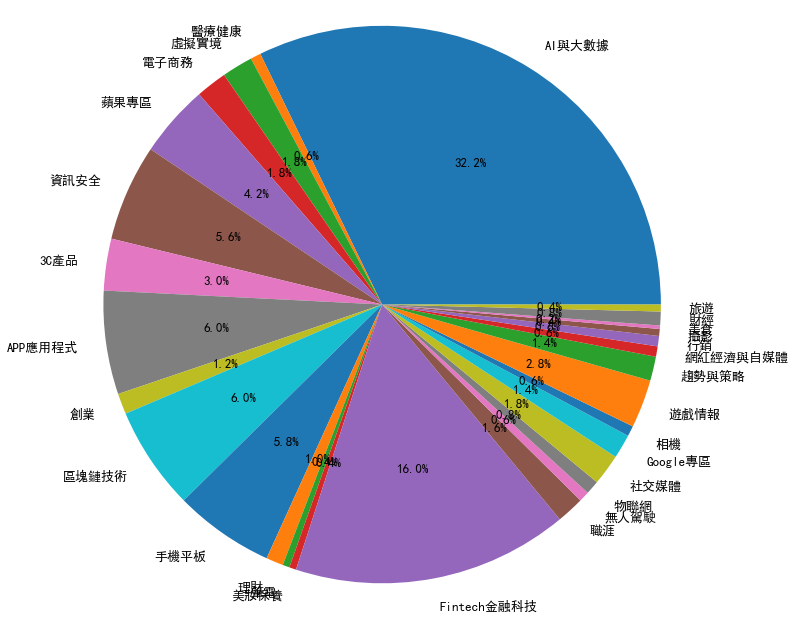

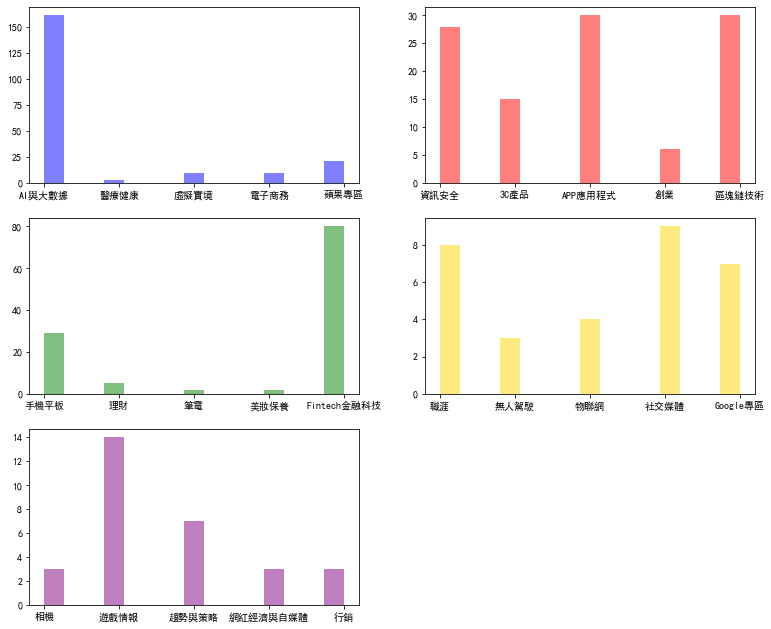

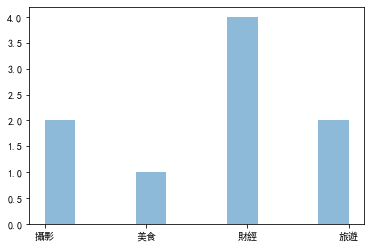

In [25]:
# 用Counter計算種類後排序顯示
from collections import Counter
import matplotlib.pyplot as plt

sourceDict = dict(Counter(categorylist))
categoryDf = DataFrame(list(sourceDict.items()))
print(categoryDf.info())

# 解決圖形的中文顯示問題
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 繪出圓餅圖
plt.figure(figsize=(11,11)) # 顯示圖框架大小
#plt.title('新聞種類分布', fontsize = '25')
labels = categoryDf[0]          # 製作圓餅圖的類別標籤
size = categoryDf[1]            # 製作圓餅圖的數值來源
patches,l_text,p_text = plt.pie(size, labels=labels, autopct = '%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.show()

histshow_num = 5
histfigure_num_x = 3
histfigure_num_y = 2
# 繪出長條圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple', 
         'orange', 'm', 'teal', 'rosybrown', 'olive', 
         'c', 'navy', 'thistle', 'palegreen', 'pink', 'turquoise'
         'y', 'chocolate', 'grey', 'crimson', 'darkcyan']
plotlist = []
plt.figure(figsize = (13,int(len(categoryDf)/2)-histfigure_num_x))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % histshow_num == 0:
        plt.subplot(histfigure_num_x, histfigure_num_y, int(count/histshow_num))
        plt.hist(plotlist, alpha=0.5, bins = 15, color=color[int(count/histshow_num-1)])
        plotlist = []
    count += 1
plt.show()
plt.hist(plotlist, alpha=0.5)
plt.show()